In [1]:
import specpy as sp
#Как раз мой плагин

import numpy as np
#Библиотека для работы с многомерными массивами и быстрыми операциями над ними

import matplotlib.pylab as plt
#Библиотека для отображения графиков, картинок и всякого такого

In [10]:
fd = sp.load('./CdTeGaAs_800_30sx2_20um_50p.spe')
#Загружаем данные из файла в переменную fd

In [11]:
print(fd)
#Просмотрим всю информацию о файле

CdTeGaAs_800_30sx2_20um_50p

Размерность данных:
  x_dim (Колличество кадров):                  100
  y_dim (Колличетсво пространственных точек):  100
  w_dim (Колличетсво длин волн):               1340

Диапозон длин волн: 758.4852042207269 - 840.9539647626342


In [12]:
if fd.contains_wave(800) and fd.contains_wave(810):
#Проверим, содержит ли диапозон длины волн 800 и 810
    fd = fd.wave_slice(820, 830)
    #Вырежем из всего диапазона длины волн с 800 по 810
    
print(fd)
#Просмотрим что получилось

Размерность данных:
  x_dim (Колличество кадров):                  100
  y_dim (Колличетсво пространственных точек):  100
  w_dim (Колличетсво длин волн):               165

Диапозон длин волн: 819.9954415869528 - 830.0307580396159


In [13]:
fd = fd.wave_fold()
#Сложим все значения вдоль оси длин волн

print(fd)
#Просмотрим что получилось

Размерность данных:
  x_dim (Колличество кадров):                  100
  y_dim (Колличетсво пространственных точек):  100
  w_dim (Колличетсво длин волн):               1

Диапозон длин волн: 819.9954415869528 - 830.0307580396159


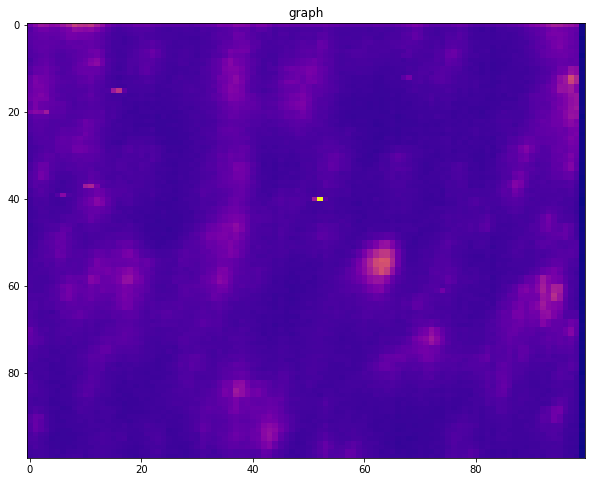

In [21]:
plt.figure(figsize=(10,8))
#Pададим размер картинки

img = fd.values[:,:,0]
#fd.values - как раз массив всех интенсивностей
#Запись [:,:,0] означает, что мы берем все значения вдоль первой и второй оси, а по третьей берем только первое(нулевое)

plt.imshow(img, cmap='plasma', aspect = 'auto')
#Построим картинку
#cmap - цветовая гамма, aspect - отношение сторон картинки

plt.title('graph');
#Зададим заголовок
#';' убирает лишние логи

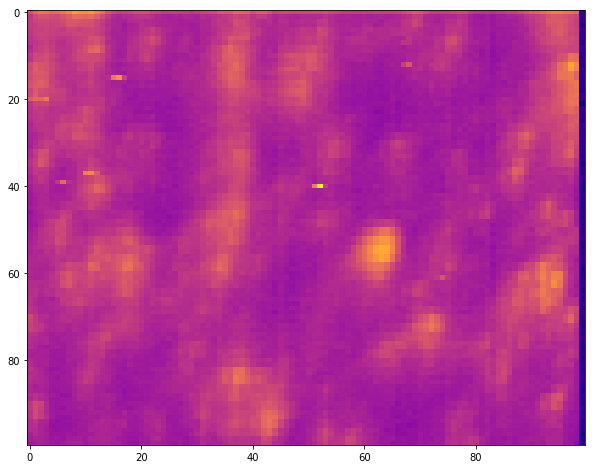

In [23]:
img = np.log(fd.values[:,:,0] + 1)
#К массиву значений можно применять какие-то преобразования при помощи пакета numpy

plt.figure(figsize=(10,8))
plt.imshow(np.log(fd.values[:,:,0] + 10), cmap='plasma', aspect = 'auto')

plt.savefig("picture.png")
#Сохраним картинку

In [25]:
sp.save(fd, './framedata.spe')
#Сохраним файл